<a href="https://colab.research.google.com/github/Rainniee/INFO-7374-Project---Style-transfer/blob/master/Model%20Experiment%204_Style%20Transfer%20With%20Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os, zipfile, io, requests
URL = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
def download_images(url):
    r = requests.get(url, stream=True)
    print ('Downloading ' + url )
    zip_ref = zipfile.ZipFile(io.BytesIO(r.content))
    zip_ref.extractall('./')
    zip_ref.close()
download_images(URL)

In [0]:
import numpy as np
from PIL import Image
import six.moves.cPickle as pickle

data = {}
data['train'] = {}
data['val'] = {}
data['train']['image'] = []
data['train']['label'] = []
data['val']['image'] = []
data['val']['label'] = []

size = (32, 32)

N = 400 
## 80% as training dataset and 20% as validation dataset in each 500 images

# First load wnids
wnids = list(map(lambda x: x.strip(), open('tiny-imagenet-200/wnids.txt').readlines()))

# Split the training and validation dataset
for i in range(len(wnids)):
    wnid = wnids[i]
    print ("{}: {} / {}".format(wnid, i + 1, len(wnids)))
    
    for j in range(500):
        path = "tiny-imagenet-200/train/{0}/images/{0}_{1}.JPEG".format(wnid, j)
        image = (Image.open(path).convert('RGB'))
        image = image.resize(size, Image.ANTIALIAS)
        image = np.array(image)
        if j < N:
            data['train']['image'].append(image)
            data['train']['label'].append(i)
        else:
            data['val']['image'].append(image)
            data['val']['label'].append(i)

# Dump train.pkl
pickle.dump(data, open('train.pkl', 'wb', -1))

n02124075: 1 / 200
n04067472: 2 / 200
n04540053: 3 / 200
n04099969: 4 / 200
n07749582: 5 / 200
n01641577: 6 / 200
n02802426: 7 / 200
n09246464: 8 / 200
n07920052: 9 / 200
n03970156: 10 / 200
n03891332: 11 / 200
n02106662: 12 / 200
n03201208: 13 / 200
n02279972: 14 / 200
n02132136: 15 / 200
n04146614: 16 / 200
n07873807: 17 / 200
n02364673: 18 / 200
n04507155: 19 / 200
n03854065: 20 / 200
n03838899: 21 / 200
n03733131: 22 / 200
n01443537: 23 / 200
n07875152: 24 / 200
n03544143: 25 / 200
n09428293: 26 / 200
n03085013: 27 / 200
n02437312: 28 / 200
n07614500: 29 / 200
n03804744: 30 / 200
n04265275: 31 / 200
n02963159: 32 / 200
n02486410: 33 / 200
n01944390: 34 / 200
n09256479: 35 / 200
n02058221: 36 / 200
n04275548: 37 / 200
n02321529: 38 / 200
n02769748: 39 / 200
n02099712: 40 / 200
n07695742: 41 / 200
n02056570: 42 / 200
n02281406: 43 / 200
n01774750: 44 / 200
n02509815: 45 / 200
n03983396: 46 / 200
n07753592: 47 / 200
n04254777: 48 / 200
n02233338: 49 / 200
n04008634: 50 / 200
n02823428

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_val, y_val) = (data['train']['image'],data['train']['label']),(data['val']['image'],data['val']['label'])

num_classes=200

x_train = np.array(x_train)
x_val = np.array(x_val)
x_train =x_train/ 255
x_val = x_val/255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

Using TensorFlow backend.


In [0]:
#import register_converters as _register_converters
from keras.preprocessing import image
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import optimizers

import argparse

# Import necessary components to build alexnet
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

from time import time

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
np.random.seed(1000)

from keras import backend as K
K.set_image_dim_ordering('th')

print('AlexNet Implementation Using Keras')
  
logs = "logs/AlexNet/"     
model_name = 'AlexNet_TinyImagenet200.h5'


#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=x_train.shape[1:], kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same', data_format = 'channels_first'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 3rd Convolutional Layer
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', data_format = 'channels_first'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', data_format = 'channels_first'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', data_format = 'channels_first'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(32*32*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(200))
model.add(Activation('softmax'))

model.summary()

AlexNet Implementation Using Keras
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 8, 1)          371808    
_________________________________________________________________
activation_1 (Activation)    (None, 96, 8, 1)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 96, 4, 1)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 4, 1)         2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 256, 4, 1)         0         
____________________________________________________

In [0]:
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

batch_size = 512
num_classes = 200
num_epochs = 20

history = model.fit(x_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(x_val, y_val))

# Score trained model.
scores = model.evaluate(x_val, y_val, verbose=1)

print('Validation loss:', scores[0])
print('Validation accuracy:', scores[1])

Instructions for updating:
Use tf.cast instead.
Train on 80000 samples, validate on 20000 samples
Epoch 1/20
80000/80000 [==============================] - 27s 338us/step - loss: 5.2991 - acc: 0.0044 - val_loss: 5.2983 - val_acc: 0.0050
Epoch 2/20
80000/80000 [==============================] - 19s 242us/step - loss: 5.2987 - acc: 0.0038 - val_loss: 5.2983 - val_acc: 0.0050
Epoch 3/20
80000/80000 [==============================] - 20s 244us/step - loss: 5.2986 - acc: 0.0042 - val_loss: 5.2983 - val_acc: 0.0050
Epoch 4/20
80000/80000 [==============================] - 20s 248us/step - loss: 5.2986 - acc: 0.0046 - val_loss: 5.2983 - val_acc: 0.0050
Epoch 5/20
80000/80000 [==============================] - 20s 253us/step - loss: 5.2986 - acc: 0.0041 - val_loss: 5.2983 - val_acc: 0.0050
Epoch 6/20
80000/80000 [==============================] - 20s 255us/step - loss: 5.2986 - acc: 0.0046 - val_loss: 5.2983 - val_acc: 0.0050
Epoch 7/20
80000/80000 [==============================] - 20s 252us/

In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)
mpl.rcParams['axes.grid'] = False

import numpy as np
from PIL import Image
import time
import functools

In [0]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe

from tensorflow.python.keras.preprocessing import image as kp_image
from tensorflow.python.keras import models 
from tensorflow.python.keras import losses
from tensorflow.python.keras import layers
from tensorflow.python.keras import backend as K

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Set up some global values here
                                             
content_path = 'drive/My Drive/Team 3 Final Project/dog.jpg'
style_path = 'drive/My Drive/Team 3 Final Project/dora-maar-picasso.jpg'

In [0]:
def load_img(path_to_img):
  max_dim = 512
  img = Image.open(path_to_img)
  long = max(img.size)
  scale = max_dim/long
  img = img.resize((round(img.size[0]*scale), round(img.size[1]*scale)), Image.ANTIALIAS)
  
  img = kp_image.img_to_array(img)
  
  # We need to broadcast the image array such that it has a batch dimension 
  img = np.expand_dims(img, axis=0)
  return img

In [0]:
def imshow(img, title=None):
  # Remove the batch dimension
  out = np.squeeze(img, axis=0)
  
  # Normalize for display 
  out = out.astype('uint8')
  plt.imshow(out)
  
  if title is not None:
    plt.title(title)
  plt.imshow(out)

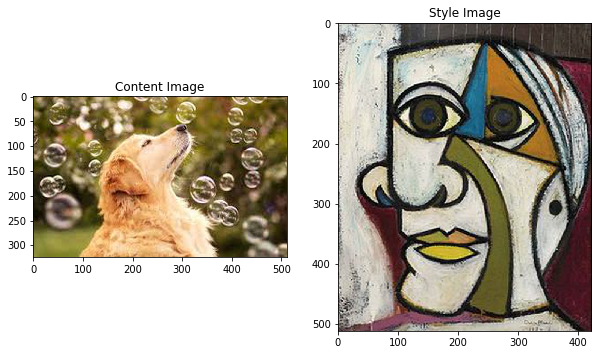

In [0]:
plt.figure(figsize=(10,10))

content = load_img(content_path).astype('uint8')
style = load_img(style_path).astype('uint8')

plt.subplot(1, 2, 1)
imshow(content, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style, 'Style Image')
plt.show()

In [0]:
def load_and_process_img(path_to_img):
  img = load_img(path_to_img)
  img = tf.keras.applications.vgg19.preprocess_input(img)
  return img

def deprocess_img(processed_img):
  x = processed_img.copy()
  if len(x.shape) == 4:
    x = np.squeeze(x, 0)
  assert len(x.shape) == 3, ("Input to deprocess image must be an image of "
                             "dimension [1, height, width, channel] or [height, width, channel]")
  if len(x.shape) != 3:
    raise ValueError("Invalid input to deprocessing image")
  
  # perform the inverse of the preprocessing step
  x[:, :, 0] += 103.939
  x[:, :, 1] += 116.779
  x[:, :, 2] += 123.68
  x = x[:, :, ::-1]

  x = np.clip(x, 0, 255).astype('uint8')
  return x

In [0]:
# Content layer where will pull our feature maps
content_layers = ['block5_conv2'] 

# Style layer we are interested in
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1'
               ]

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [0]:
def gram_matrix(input_tensor):
  # We make the image channels first 
  channels = int(input_tensor.shape[-1])
  a = tf.reshape(input_tensor, [-1, channels])
  n = tf.shape(a)[0]
  gram = tf.matmul(a, a, transpose_a=True)
  return gram / tf.cast(n, tf.float32)

def get_style_loss(base_style, gram_target):
  """Expects two images of dimension h, w, c"""
  # height, width, num filters of each layer
  
  # We scale the loss at a given layer by the size of the feature map and the number of filters
  height, width, channels = base_style.get_shape().as_list()
  gram_style = gram_matrix(base_style)
  
  return tf.reduce_mean(tf.square(gram_style - gram_target))# / (4. * (channels ** 2) * (width * height) ** 2)

In [0]:
def get_feature_representations(model, content_path, style_path):
  """Helper function to compute our content and style feature representations.

  This function will simply load and preprocess both the content and style 
  images from their path. Then it will feed them through the network to obtain
  the outputs of the intermediate layers. 
  
  Arguments:
    model: The model that we are using.
    content_path: The path to the content image.
    style_path: The path to the style image
    
  Returns:
    returns the style features and the content features. 
  """
  
  # Load our images in 
  content_image = load_and_process_img(content_path)
  style_image = load_and_process_img(style_path)
  
  # batch compute content and style features
  style_outputs = model(style_image)
  content_outputs = model(content_image)
  
  
  # Get the style and content feature representations from our model  
  style_features = [style_layer[0] for style_layer in style_outputs[:num_style_layers]]
  content_features = [content_layer[0] for content_layer in content_outputs[num_style_layers:]]
  return style_features, content_features

In [0]:
def compute_loss(model, loss_weights, init_image, gram_style_features, content_features):
  """This function will compute the loss total loss.
  
  Arguments:
    model: The model that will give us access to the intermediate layers
    loss_weights: The weights of each contribution of each loss function. 
                  (style weight, content weight, and total variation weight)
    init_image: Our initial base image. This image is what we are updating with 
                our optimization process. We apply the gradients wrt the loss 
                we are calculating to this image.
    gram_style_features: Precomputed gram matrices corresponding to the defined 
                         style layers of interest.
    content_features: Precomputed outputs from defined content layers of interest.
      
  Returns:
    returns the total loss, style loss, content loss, and total variational loss  
    
"""
 
  style_weight, content_weight = loss_weights
  
  # Feed our init image through our model. This will give us the content and 
  # style representations at our desired layers. Since we're using eager
  # our model is callable just like any other function!
  model_outputs = model(init_image)
  
  style_output_features = model_outputs[:num_style_layers]
  content_output_features = model_outputs[num_style_layers:]
  
  style_score = 0
  content_score = 0

  # Accumulate style losses from all layers
  # Here, we equally weight each contribution of each loss layer
  weight_per_style_layer = 1.0 / float(num_style_layers)
  for target_style, comb_style in zip(gram_style_features, style_output_features):
    style_score += weight_per_style_layer * get_style_loss(comb_style[0], target_style)
    
  # Accumulate content losses from all layers 
  weight_per_content_layer = 1.0 / float(num_content_layers)
  for target_content, comb_content in zip(content_features, content_output_features):
    content_score += weight_per_content_layer* get_content_loss(comb_content[0], target_content)
  
  style_score *= style_weight
  content_score *= content_weight

  # Get total loss
  loss = style_score + content_score 
  return loss, style_score, content_score

In [0]:
# Compute the gradients:
def compute_grads(cfg):
  with tf.GradientTape() as tape: 
    all_loss = compute_loss(**cfg)
    
  # Compute gradients wrt input image
  total_loss = all_loss[0]
  return tape.gradient(total_loss, cfg['init_image']), all_loss

In [0]:
import IPython.display

def run_style_transfer(content_path, 
                       style_path,
                       num_iterations=1000,
                       content_weight=1e3, 
                       style_weight=1e-2): 
  # We don't need to (or want to) train any layers of our model, so we set their
  # trainable to false. 
  # for layer in model.layers:
    # layer.trainable = False
  
  # Get the style and content feature representations (from our specified intermediate layers) 
  style_features, content_features = get_feature_representations(model, content_path, style_path)
  gram_style_features = [gram_matrix(style_feature) for style_feature in style_features]
  
  # Set initial image
  init_image = load_and_process_img(content_path)
  init_image = tfe.Variable(init_image, dtype=tf.float32)
  # Create our optimizer
  opt = tf.train.AdamOptimizer(learning_rate=5, beta1=0.99, epsilon=1e-1)

  # For displaying intermediate images 
  iter_count = 1
  
  # Store our best result
  best_loss, best_img = float('inf'), None
  
  # Create a nice config 
  loss_weights = (style_weight, content_weight)
  cfg = {
      'model': model,
      'loss_weights': loss_weights,
      'init_image': init_image,
      'gram_style_features': gram_style_features,
      'content_features': content_features
  }
    
  # For displaying
  num_rows = 2
  num_cols = 5
  display_interval = num_iterations/(num_rows*num_cols)
  start_time = time.time()
  global_start = time.time()
  
  norm_means = np.array([103.939, 116.779, 123.68])
  min_vals = -norm_means
  max_vals = 255 - norm_means   
  
  imgs = []
  for i in range(num_iterations):
    grads, all_loss = compute_grads(cfg)
    loss, style_score, content_score = all_loss
    opt.apply_gradients([(grads, init_image)])
    clipped = tf.clip_by_value(init_image, min_vals, max_vals)
    init_image.assign(clipped)
    end_time = time.time() 
    
    if loss < best_loss:
      # Update best loss and best image from total loss. 
      best_loss = loss
      best_img = deprocess_img(init_image.numpy())

    if i % display_interval== 0:
      start_time = time.time()
      
      # Use the .numpy() method to get the concrete numpy array
      plot_img = init_image.numpy()
      plot_img = deprocess_img(plot_img)
      imgs.append(plot_img)
      IPython.display.clear_output(wait=True)
      IPython.display.display_png(Image.fromarray(plot_img))
      print('Iteration: {}'.format(i))        
      print('Total loss: {:.4e}, ' 
            'style loss: {:.4e}, '
            'content loss: {:.4e}, '
            'time: {:.4f}s'.format(loss, style_score, content_score, time.time() - start_time))
  print('Total time: {:.4f}s'.format(time.time() - global_start))
  IPython.display.clear_output(wait=True)
  plt.figure(figsize=(14,4))
  for i,img in enumerate(imgs):
      plt.subplot(num_rows,num_cols,i+1)
      plt.imshow(img)
      plt.xticks([])
      plt.yticks([])
      
  return best_img, best_loss, end_time, global_start
    

In [0]:
best, best_loss, end_time, global_start = run_style_transfer(content_path, 
                                     style_path, num_iterations=100)

ValueError: ignored